In [ ]:
 import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

In [ ]:
#Here we are connecting our data file
boardGames = pd.read_csv('boardgames1.csv')
boardGames.describe()

,objectid,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,max_community,totalvotes,languagedependence,usersrated,average,baverage,stddev,avgweight,numweights,numgeeklists,numtrading,numwanting,numcomments,siteviews,numplays,numplays_month,news,blogs,weblink,podcast,boardgamedesigner_cnt,boardgameartist_cnt,boardgamepublisher_cnt,boardgamehonor_cnt,boardgamecategory_cnt,boardgamemechanic_cnt,boardgameexpansion_cnt,boardgameversion_cnt,boardgamefamily_cnt
count,20000.00000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.00000,20000.000000,14141.000000,14803.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,88667.61500,1981.268700,10000.500000,2.055250,5.59215,68.096450,94.28945,9.476350,3.203522,4.277917,13.461350,1.35465,739.616350,6.275440,5.297689,1.499691,1.931761,48.059050,244.243000,40.097900,39.376050,191.515100,7.632353e+04,2304.163050,16.018050,0.518000,10.146900,6.255150,1.943050,1.339200,1.379250,2.500100,0.436000,2.568050,2.306900,1.185750,3.392800,1.429500
std,90640.91959,219.223277,5773.647028,0.745537,15.04921,466.502106,1005.75196,3.738842,1.398935,2.155624,57.169377,1.39713,3096.843206,1.065339,1.494174,0.340743,0.897206,198.113638,1079.125263,94.094807,113.503485,606.892077,2.252393e+05,13625.576506,111.374578,1.282754,38.772952,11.053866,7.956222,0.787003,4.768926,5.082961,1.609824,1.366515,1.707764,6.809425,12.317236,1.728375
min,1.00000,-3500.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.830000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5858.75000,1997.000000,5000.750000,2.000000,4.00000,20.000000,30.00000,8.000000,2.000000,3.000000,1.000000,0.00000,47.000000,5.712777,5.502933,1.309920,1.255050,4.000000,24.000000,4.000000,2.000000,21.000000,1.163450e+04,55.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000
50%,39278.50000,2008.000000,10000.500000,2.000000,4.00000,30.000000,45.00000,10.000000,3.000000,4.000000,3.000000,1.00000,105.000000,6.354170,5.545040,1.471575,1.910900,9.000000,59.000000,12.000000,8.000000,44.000000,2.366050e+04,177.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.000000,2.000000,1.000000
75%,169680.50000,2015.000000,15000.250000,2.000000,6.00000,60.000000,90.00000,12.000000,4.000000,5.000000,7.000000,2.00000,333.250000,6.955793,5.674960,1.663783,2.500000,25.000000,178.000000,35.000000,26.000000,122.000000,5.791975e+04,703.250000,3.000000,1.000000,6.000000,7.000000,1.000000,2.000000,2.000000,2.000000,0.000000,3.000000,3.000000,0.000000,3.000000,2.000000
max,295770.00000,2021.000000,20000.000000,10.000000,999.00000,60000.000000,120000.00000,25.000000,31.000000,31.000000,1868.000000,5.00000,90730.000000,9.442860,8.584240,4.500000,5.000000,7104.000000,121243.000000,2311.000000,2068.000000,17143.000000,8.933078e+06,627501.000000,5694.000000,30.000000,1158.000000,212.000000,577.000000,21.000000,508.000000,174.000000,50.000000,14.000000,18.000000,444.000000,1002.000000,86.000000


In [ ]:
#We find out, that some columns are not useable for our analyse, so we decited to delete them
boardGames = boardGames.drop(['objectid', 'name', 'min_community', 'max_community', 'label',
                   'playerage', 'totalvotes', 'sortindex', 'boardgamedesigner',
                   'boardgamehonor', 'boardgamecategory', 'boardgamemechanic', 
                   'boardgameexpansion', 'boardgamefamily', 'description', 'gamelink',
                   'boardgameartist', 'boardgamepublisher', 'boardgameversion'], axis=1)
boardGames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yearpublished           20000 non-null  int64  
 1   minplayers              20000 non-null  int64  
 2   maxplayers              20000 non-null  int64  
 3   minplaytime             20000 non-null  int64  
 4   maxplaytime             20000 non-null  int64  
 5   minage                  20000 non-null  int64  
 6   languagedependence      20000 non-null  int64  
 7   usersrated              20000 non-null  int64  
 8   average                 20000 non-null  float64
 9   baverage                20000 non-null  float64
 10  stddev                  20000 non-null  float64
 11  avgweight               20000 non-null  float64
 12  numweights              20000 non-null  int64  
 13  numgeeklists            20000 non-null  int64  
 14  numtrading              20000 non-null

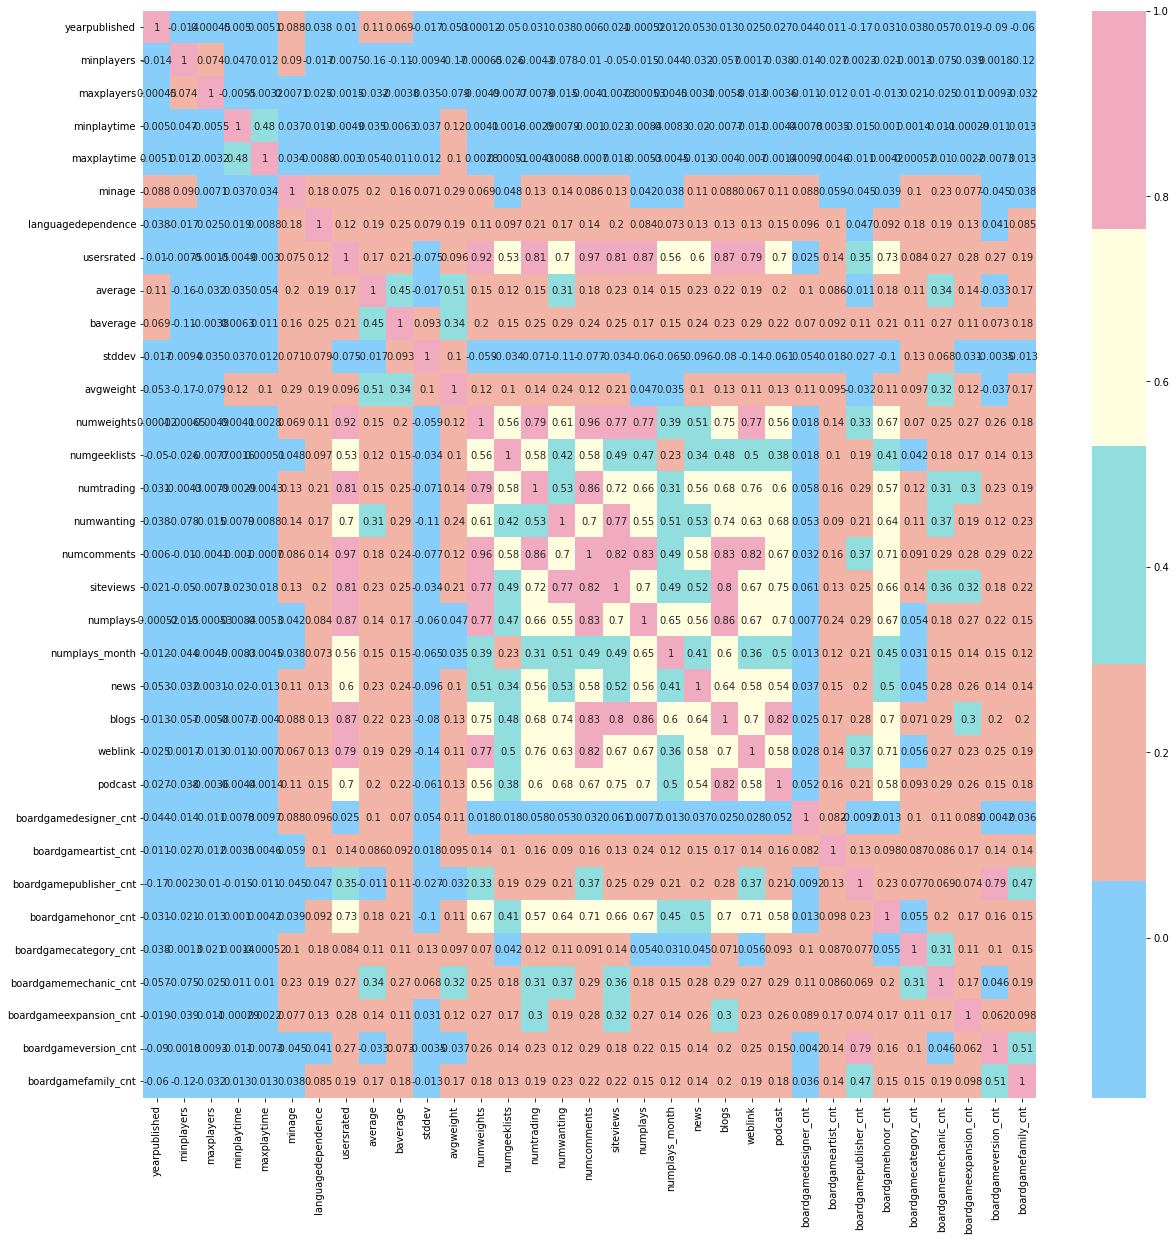

In [ ]:
cmap = colors.ListedColormap(["#87CEFA", "#F1B4A7", "#92DDDE","#FFFFE0","#F0ABC1"])
korrelatsiooniTabel = boardGames.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(korrelatsiooniTabel,annot=True, cmap=cmap)

AttributeError: ignored

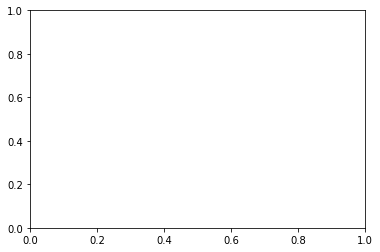

In [ ]:
#This is done only to make plots more readeable.
boardGames = boardGames[(boardGames["yearpublished"]>1950)]
boardGames = boardGames[(boardGames["minplayers"]>0)]
boardGames = boardGames[(boardGames["maxplayers"]<20)]
boardGames = boardGames[(boardGames["minplaytime"]>0)]
boardGames = boardGames[(boardGames["minplaytime"]<300)]
boardGames = boardGames[(boardGames["maxplaytime"]>0)]
boardGames = boardGames[(boardGames["maxplaytime"]<300)]
boardGames = boardGames[(boardGames["baverage"]>0)]
boardGames = boardGames[(boardGames["avgweight"]>0)]

for columns in boardGames:
  boardGames.plot.scatter(x=columns, y="average", alpha=0.5 , tittel=columns)